In [110]:
# imports 
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from sklearn.model_selection import train_test_split

# acquire
from env import host, user, password
from pydataset import data

### Data Acquisition Exercises

### 1) In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [34]:
data('iris', show_doc=True)

df_iris = data('iris')

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

- print the first 3 rows

In [35]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)

In [36]:
df_iris.shape

(150, 5)

- print the column names

In [37]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

- print the data type of each column

In [38]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [39]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2) Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [40]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


- assign the first 100 rows to a new dataframe, df_excel_sample

In [111]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


- print the number of rows of your original dataframe

In [43]:
count_row = df_excel.shape[0]
count_row

7049

- print the first 5 column names

In [58]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [52]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [53]:
df_excel.select_dtypes(include = ['object']).head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


- compute the range for each of the numeric variables.

In [59]:
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [61]:
stats = df_excel[['monthly_charges', 'total_charges']].describe().T
stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [62]:
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 3) Read the data from this google sheet into a dataframe, df_google

In [17]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

- print the first 3 rows

In [18]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [20]:
df_google.shape

(891, 12)

- print the column names

In [21]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column

In [22]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [60]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- print the unique values for each of your categorical variables

In [63]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


### 4) Make a new python module, acquire.py to hold the following data aquisition functions:

- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame.

In [67]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [68]:
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df

In [69]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in titanic df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('titanic_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    return df

In [70]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids.

In [71]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [72]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in iris df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('iris_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_iris_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('iris_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    return df

In [100]:
iris_data = get_iris_data()
iris_data.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### ----------------------------------------------------------------------------------------------


### Data Prep Exercises

### ----------------------------------------------------------------------------------------------

#### 1) Use the function defined in acquire.py to load the iris data.

In [81]:
# using the get_iris_data from acquire to access the data

iris_df = get_iris_data(cached=True)
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


#### 2) Drop the species_id and measurement_id columns

In [82]:
# checking the data info, pre-drop

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
species_id      150 non-null int64
species_name    150 non-null object
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [85]:
# as there is no column named "measurement_id", I ignored that one
# checking the data info, post-drop

iris_df = iris_df.drop(columns=['species_id'])
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
species_name    150 non-null object
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### 3) Rename the species_name column to just species.

In [89]:
# using the .rename function

iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
species         150 non-null object
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### 4) Create dummy variables of the species name.

In [97]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [96]:
# First I create a new dataframe that holds my encoded columns.

species_dummies = pd.get_dummies(iris_df.species, drop_first=True)
species_dummies.sample(5)

,versicolor,virginica
144,0,1
5,0,0
78,1,0
142,0,1
136,0,1


In [99]:
# Then I stitch the dataframes together

iris_df = pd.concat([iris_df, species_dummies], axis=1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


#### 5) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [105]:
# Getting fresh data

iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [112]:
def clean_data(df):
    '''
    This function will take in the iris dataframe, drop species_id, 
    rename species_name to species, and create dummy vars of species. 
    '''
    df = df.drop(columns=['species_id'])
    df = df.rename(columns={'species_name': 'species'})
    species_dummies = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df, species_dummies], axis=1)
    return df

In [113]:
def split(df):
    '''
    This function takes in one df and returns train, validate, and test.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123) 
    return train, validate, test

In [114]:
def prep_iris(df):
    '''
    This function takes in the iris dataframe, drops species_id,
    renames, species_name to species, creates, dummy vars of species, 
    and performs a train, validate, test split.
    '''
    df = clean_data(df)
    train, validate, test = split(df)
    return train, validate, test

In [118]:
train, validate, test = prep_iris(iris_df)
train.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0


In [121]:
train.shape

(84, 7)

In [119]:
validate.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
62,versicolor,6.0,2.2,4.0,1.0,1,0


In [122]:
validate.shape

(36, 7)

In [120]:
test.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
72,versicolor,6.3,2.5,4.9,1.5,1,0


In [123]:
test.shape

(30, 7)

In [ ]:
train_test_split()

In [130]:
iris_df = get_iris_data()
iris_df.head(1)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2


In [135]:
# A more nuanced take on the split function that includes stratify as an option

def split(df, stratify=None):
    '''
    This takes in one df and returns train, validate, and test.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify])
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, stratify=train_validate[stratify]) 
    return train, validate, test

In [136]:
train, validate, test = split(iris_df, stratify='species_name')

In [137]:
train.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
79,2,versicolor,5.7,2.6,3.5,1.0
36,1,setosa,5.5,3.5,1.3,0.2
133,3,virginica,6.3,2.8,5.1,1.5
95,2,versicolor,5.7,3.0,4.2,1.2
18,1,setosa,5.7,3.8,1.7,0.3


### ----------------------------------------------------------------------------------------------


### Data Exploration Exercises

### ----------------------------------------------------------------------------------------------

#### 1. Use the iris dataset. Split your data into train, validate, and test samples

In [207]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from acquire import get_iris_data
from prepare import split

import warnings
warnings.filterwarnings("ignore")

In [208]:
df = get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [209]:
train, validate, test = split(df)

KeyError: None

In [210]:
# validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [239]:
train.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,petal_area
79,2,versicolor,5.7,2.6,3.5,1.0,3.50
36,1,setosa,5.5,3.5,1.3,0.2,0.26
133,3,virginica,6.3,2.8,5.1,1.5,7.65
95,2,versicolor,5.7,3.0,4.2,1.2,5.04
18,1,setosa,5.7,3.8,1.7,0.3,0.51


#### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [240]:
# First, melting the dataframe and assigning it to a unique variable
train_melt = train[['species_name', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width']].melt(id_vars='species_name',var_name = 'measurement', value_name='value')

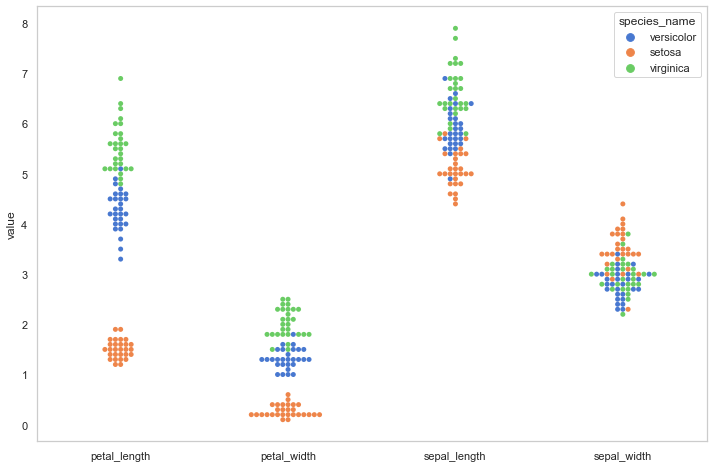

In [249]:
# Next, creating my swarmplot

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(12,8))
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="species_name",
    data=train_melt,
)

p.set(xlabel='')
plt.show()

#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length


In [242]:
# creating the sepal_area and petal_area columns

train['sepal_area'] = train.sepal_width * train.sepal_length
train['petal_area'] = train.petal_width * train.petal_length

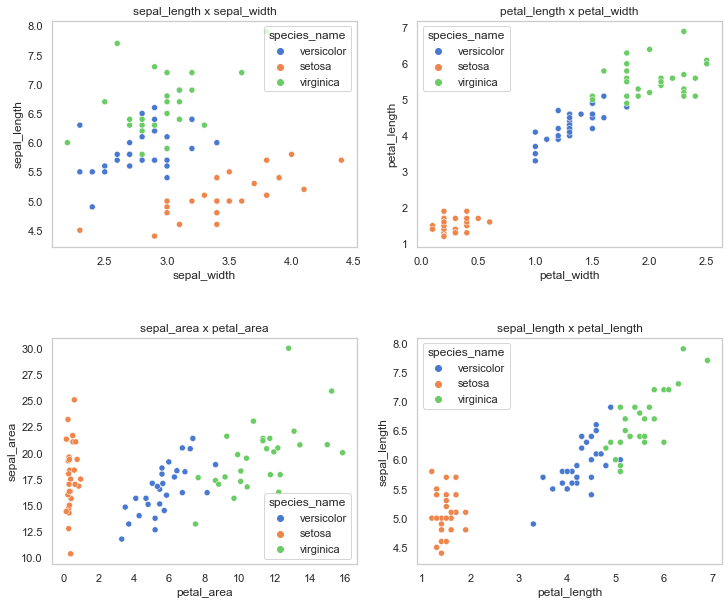

In [244]:
# creating my scatterplots with seaborn

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

plt.subplot(221)
sns.scatterplot(data=train, y='sepal_length', x='sepal_width', hue='species_name')
plt.title('sepal_length x sepal_width')

plt.subplot(222)
sns.scatterplot(data=train, y='petal_length', x='petal_width', hue='species_name')
plt.title('petal_length x petal_width')

plt.subplot(223)
sns.scatterplot(data=train, y='sepal_area', x='petal_area', hue='species_name')
plt.title('sepal_area x petal_area')

plt.subplot(224)
sns.scatterplot(data=train, y='sepal_length', x='petal_length', hue='species_name')
plt.title('sepal_length x petal_length')

plt.subplots_adjust(hspace=0.4)
plt.show()

#### What are your takeaways?

In [ ]:
# There is highest correlation between petal length and petal width
# There is lowest correlation between sepal length and sepal width

#### 4. Create a heatmap of each variable layering correlation coefficient on top.

In [247]:
# dropping non-applicable columns
train_df = train.drop(columns=['species_name', 'species_id'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 6 columns):
sepal_length    84 non-null float64
sepal_width     84 non-null float64
petal_length    84 non-null float64
petal_width     84 non-null float64
petal_area      84 non-null float64
sepal_area      84 non-null float64
dtypes: float64(6)
memory usage: 4.6 KB


In [248]:
# plotting the heatmap w correlation overlay
train_df.corr().style.background_gradient(cmap='RdYlBu')

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
sepal_length,1,-0.154904,0.867976,0.824691,0.860498,0.619853
sepal_width,-0.154904,1,-0.476228,-0.403306,-0.341702,0.673554
petal_length,0.867976,-0.476228,1,0.957345,0.95351,0.271618
petal_width,0.824691,-0.403306,0.957345,1,0.982404,0.29992
petal_area,0.860498,-0.341702,0.95351,0.982404,1,0.37387
sepal_area,0.619853,0.673554,0.271618,0.29992,0.37387,1


#### 5. Create a scatter matrix visualizing the interaction of each variable.

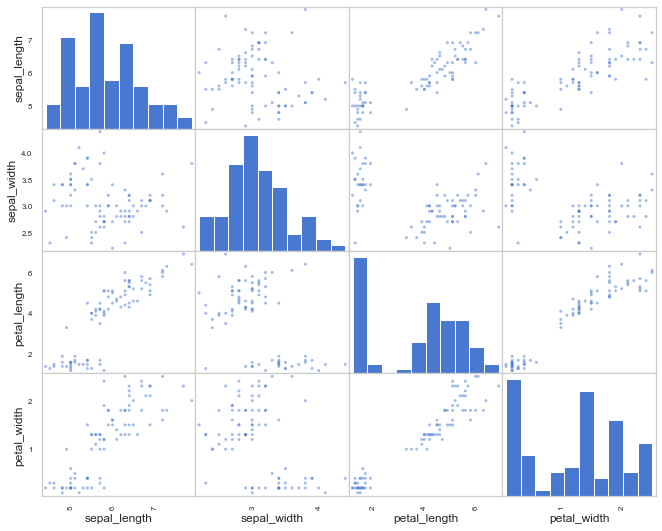

In [250]:
# importing scatter_matrix
from pandas.plotting import scatter_matrix
  
# selecting the four principle numerical variables 
features = ['sepal_length', 'sepal_width', 
            'petal_length', 'petal_width'] 
   
# plotting the scatter matrix by feature 
scatter_matrix(train_df[features]) 
plt.show() 

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

#### What is your takeaway from this statistical testing?

#### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set